## Assignment-III : IRIS.csv : MDSC-301(P)
Author : PARTH 21235


In [223]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [224]:
data = load_iris()

In [225]:
type(data)

sklearn.utils._bunch.Bunch

In [226]:
df0 = pd.DataFrame(data.data, columns = data.feature_names)
df0['Species'] = data.target

In [227]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [228]:
type(df0)

pandas.core.frame.DataFrame

In [229]:
df1 = df0.loc[:, df0.columns != 'Species']

In [230]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [231]:
type(df1)

pandas.core.frame.DataFrame

In [232]:
y = df0['Species']

In [233]:
type(y)

pandas.core.series.Series

Note:  
- Data: Bunch Type : downloaded from datasets
- df0 : dataframe : with target variable
- df1 : dataframe : without target variable
- y : Series : only target variable

### DATA DESCRIPTION

In [234]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [235]:
df0['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [236]:
df0.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [237]:
df0.duplicated().sum()

1

**Inference :**  
We notice that there are no null value present in the dataset.  
But we encounter single dunplicate, but it's also seen that data is balanced, thus we can procee dwith this dataset

In [238]:
df0.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### DATA VISUALIZATION

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fast')

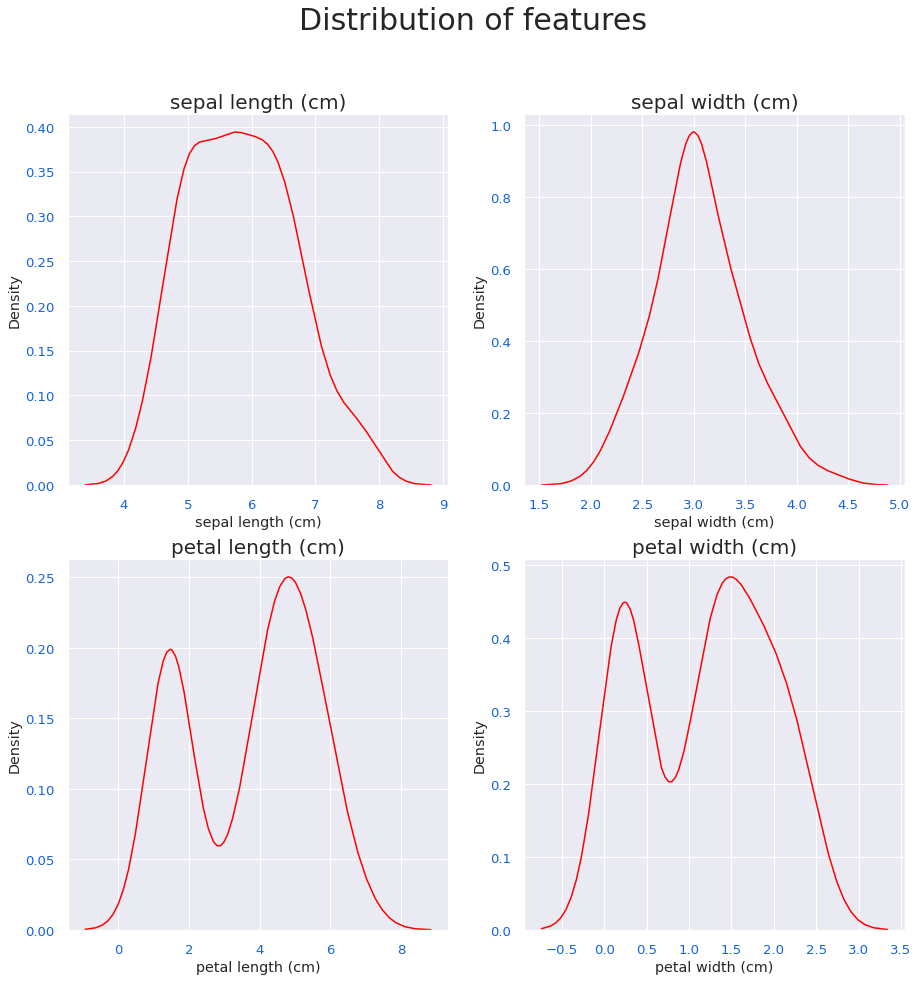

In [240]:
plt.figure(figsize=(15,15))
i=1
for feature in df1.columns:
    plt.subplot(2,2,i)
    i +=1
    sns.kdeplot(df1[feature], color='red')
    plt.title(feature, size=20)
plt.suptitle("Distribution of features", fontsize=30)
plt.show()

**Inference :**   
- petal length and width are follwoing bimodal distribution (A bimodal distribution is a probability distribution with two modes.)  
- Sepal length and width are near to normal but having variances of high and less respectively.

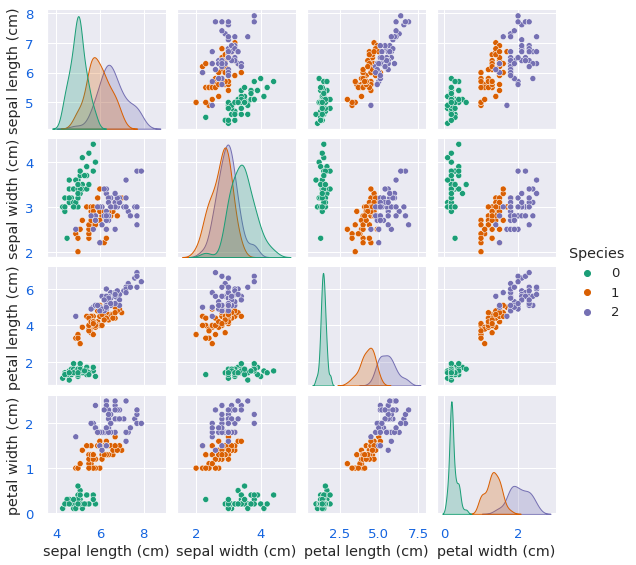

In [241]:
sns.pairplot(df0, hue = 'Species', palette = 'Dark2', height = 2)
plt.show()

**Inference :**   
- It's clearly visible that Species[0] is independent of other two species.
- Species[0] shows completely different nature. Where Sepal and Petal length and Petal Width are more for Species[0], other two has less in comparison. 
- on other hand, it's where Sepal width seems high for other two species.

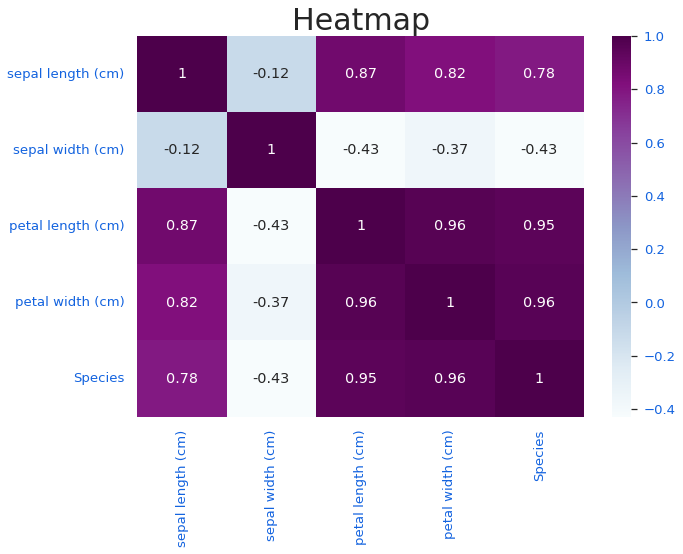

In [270]:
corr = df0.corr()
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(data=corr, annot=True, cmap="BuPu")
plt.title("Heatmap", fontsize=30)
plt.show()

**Inference :**

### Feature Scaling
***

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2)

In [245]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [246]:
from sklearn.preprocessing import MinMaxScaler

ss_iris = MinMaxScaler()
ss_iris.fit(X_train)
X_train_std = ss_iris.transform(X_train)
X_test_std = ss_iris.transform(X_test)

In [247]:
Xtrain = pd.DataFrame(X_train_std, columns = X_train.columns)
Xtest = pd.DataFrame(X_test_std, columns = X_test.columns)

### MODEL MAKING
***

#### Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression

In [249]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [250]:
y_pred = LR.predict(X_test)
y_pred


array([2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 2, 2, 0, 2])

#### Naive Bayes

In [251]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nbc = nb.fit(Xtrain, y_train)

In [252]:
y_pred = nb.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

#### K-Nearest Neighbours

In [253]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(7)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [254]:
y_pred = KNN.predict(X_test)
y_pred

array([2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 2, 2, 0, 2])

#### SVM

In [255]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [256]:
y_pred = SVM.predict(X_test)
y_pred

array([2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 2, 2, 0, 2])

### Performace Measurement
***

#### Accuracy and Confusion Matrices

In [257]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The Accuracy for Logistic Regression: 93.33333333333333 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



<AxesSubplot:>

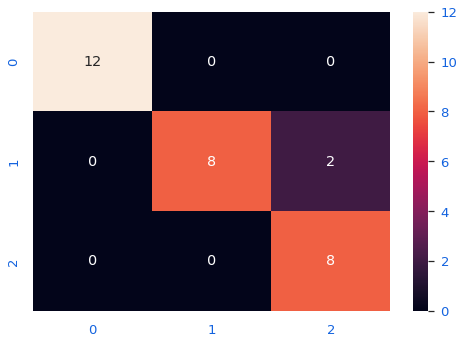

In [258]:
print("The Accuracy for Logistic Regression:", LR.score(X_test,y_test) * 100, "%\n" )
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

The Accuracy for Naive Bayes: 26.666666666666668 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



<AxesSubplot:>

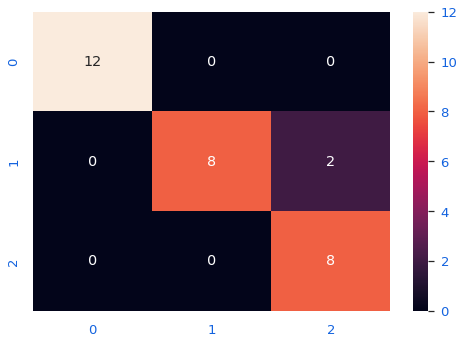

In [259]:
print("The Accuracy for Naive Bayes:", nb.score(X_test,y_test) * 100, "%\n" )
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

The Accuracy for K-Nearest Neighbours: 93.33333333333333 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



<AxesSubplot:>

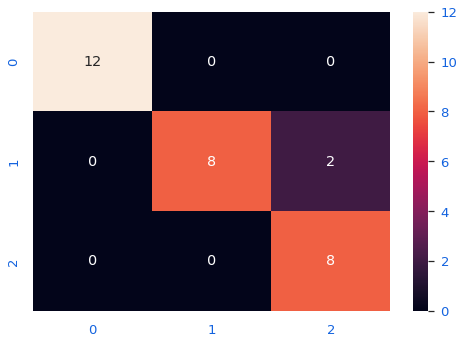

In [260]:
print("The Accuracy for K-Nearest Neighbours:", KNN.score(X_test,y_test) * 100, "%\n" )
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

The Accuracy for SUpport Vector Machine: 93.33333333333333 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



<AxesSubplot:>

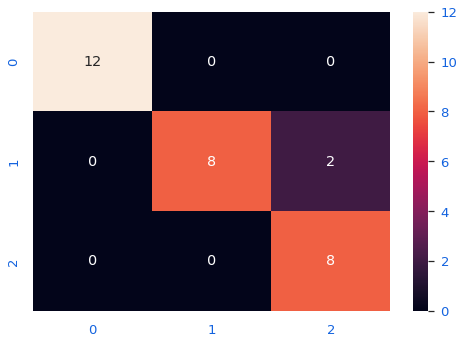

In [261]:
print("The Accuracy for SUpport Vector Machine:", SVM.score(X_test,y_test) * 100, "%\n" )
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

#### Plotting Decision Boundaries

In [262]:
def plot_decision_boundary(X,y,model_class, **model_params):
    #print(X)
    X = np.array(X)
    y = np.array(y).flatten()
    #print(X)
    reduced_data = X[:, 2:4]
    #print(reduced_data)
    model = model_class(**model_params)
    model.fit(reduced_data, y)
    h = .04
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    #print(X[:,0],X[:,1],X[:,2],X[:,3])
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = 'viridis')
    plt.scatter(X[:, 2], X[:, 3], c=y, alpha=0.8, cmap = 'binary')
    plt.xlabel("Petal Length (cm)",fontsize=15)
    plt.ylabel("Petal Width (cm)",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

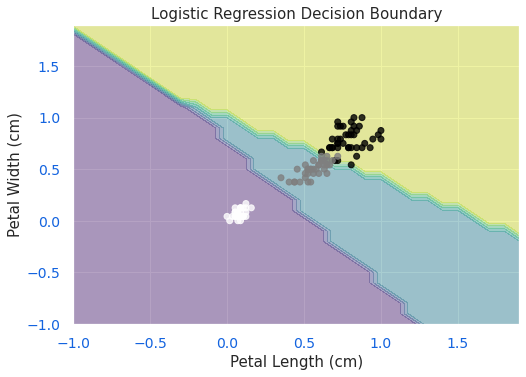

In [263]:
plt.figure()
plt.title('Logistic Regression Decision Boundary', fontsize = 15)
plot_decision_boundary(Xtrain, y_train, LogisticRegression)
plt.show()

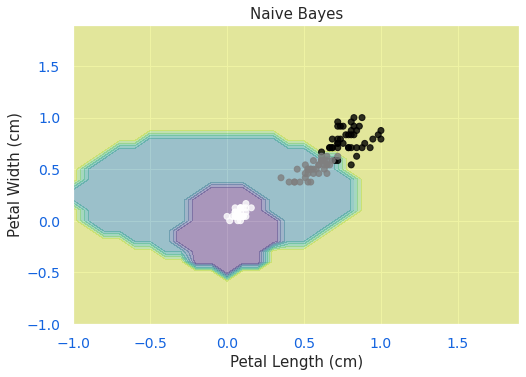

In [264]:
plt.figure()
plt.title('Naive Bayes', fontsize = 15)
plot_decision_boundary(Xtrain, y_train, GaussianNB)
plt.show()

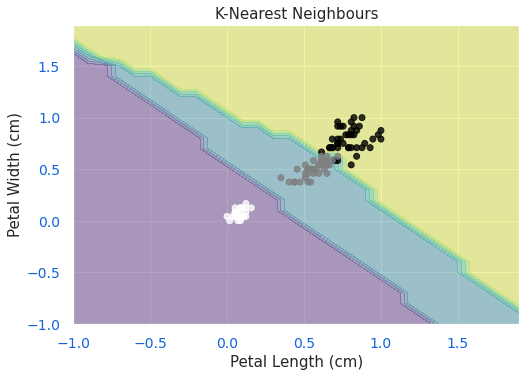

In [265]:
plt.figure()
plt.title('K-Nearest Neighbours', fontsize = 15)
plot_decision_boundary(Xtrain, y_train, KNeighborsClassifier)
plt.show()

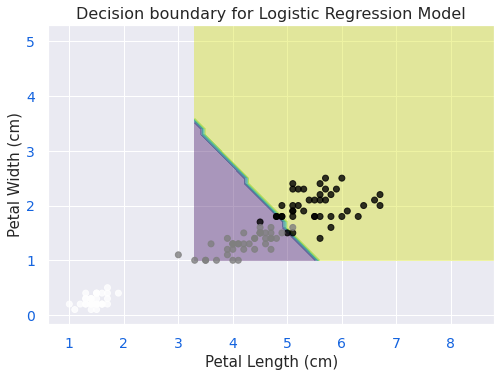

In [274]:
plt.figure()
plt.title("Decision boundary for Logistic Regression Model", fontsize = 16)
plot_decision_boundary(X_train, y_train, svm.SVC)
plt.show()